In [1]:
#Importing all librabries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#reading the data set files
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df.head(5)

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [41]:
train_df.shape

(18247, 5)

In [42]:
test_df.shape

(7650, 3)

In [8]:
#to see the existence of any NULL values
test_df.isnull().sum()

date    0
hour    0
dtype: int64

In [6]:
##to see the existence of any NULL values
train_df.isnull().sum()

date      0
hour      0
demand    0
dtype: int64

In [7]:
test_df.isnull().sum()

date    0
hour    0
dtype: int64

In [10]:
#here firstly I tried to break down the DATE column into respective sub columns such as hour,year,month inorder to understand the data much better
train_df['year'] = pd.DatetimeIndex(train_df['date']).year
train_df['month'] = pd.DatetimeIndex(train_df['date']).month

In [11]:
train_df.head(5)

,date,hour,demand,year,month
0,2018-08-18,9,91,2018,8
1,2018-08-18,10,21,2018,8
2,2018-08-18,13,23,2018,8
3,2018-08-18,14,104,2018,8
4,2018-08-18,15,81,2018,8


In [13]:
train_df['day'] = pd.DatetimeIndex(train_df['date']).day
train_df.head(5)

,date,hour,demand,year,month,day
0,2018-08-18,9,91,2018,8,18
1,2018-08-18,10,21,2018,8,18
2,2018-08-18,13,23,2018,8,18
3,2018-08-18,14,104,2018,8,18
4,2018-08-18,15,81,2018,8,18


In [14]:
#as the year column consists of year range from 2018 to 2021 I tried to bring it down to individual digits by substracting it with current year but less than the year which I should [predict] the outcome
train_df['current_year']=2021
train_df.head(5)

,date,hour,demand,year,month,day,current_year
0,2018-08-18,9,91,2018,8,18,2021
1,2018-08-18,10,21,2018,8,18,2021
2,2018-08-18,13,23,2018,8,18,2021
3,2018-08-18,14,104,2018,8,18,2021
4,2018-08-18,15,81,2018,8,18,2021


In [16]:
train_df['no_of_years']=train_df['current_year']-train_df['year']
train_df.head(5)

,date,hour,demand,year,month,day,current_year,no_of_years
0,2018-08-18,9,91,2018,8,18,2021,3
1,2018-08-18,10,21,2018,8,18,2021,3
2,2018-08-18,13,23,2018,8,18,2021,3
3,2018-08-18,14,104,2018,8,18,2021,3
4,2018-08-18,15,81,2018,8,18,2021,3


In [22]:
#dropping unnecessary columns into to understand the data in much better way!
train_df.drop(['date','year','current_year'],axis=1,inplace=True)
train_df.head(5)

,hour,demand,month,day,no_of_years
0,9,91,8,18,3
1,10,21,8,18,3
2,13,23,8,18,3
3,14,104,8,18,3
4,15,81,8,18,3


In [31]:
#to find the existence of any correlations in the data!
train_df.corr()

,hour,demand,month,day,no_of_years
hour,1.000000,0.161498,0.019039,0.003022,0.043771
demand,0.161498,1.000000,0.041036,-0.033689,-0.041879
month,0.019039,0.041036,1.000000,0.022906,0.487684
day,0.003022,-0.033689,0.022906,1.000000,0.028902
no_of_years,0.043771,-0.041879,0.487684,0.028902,1.000000


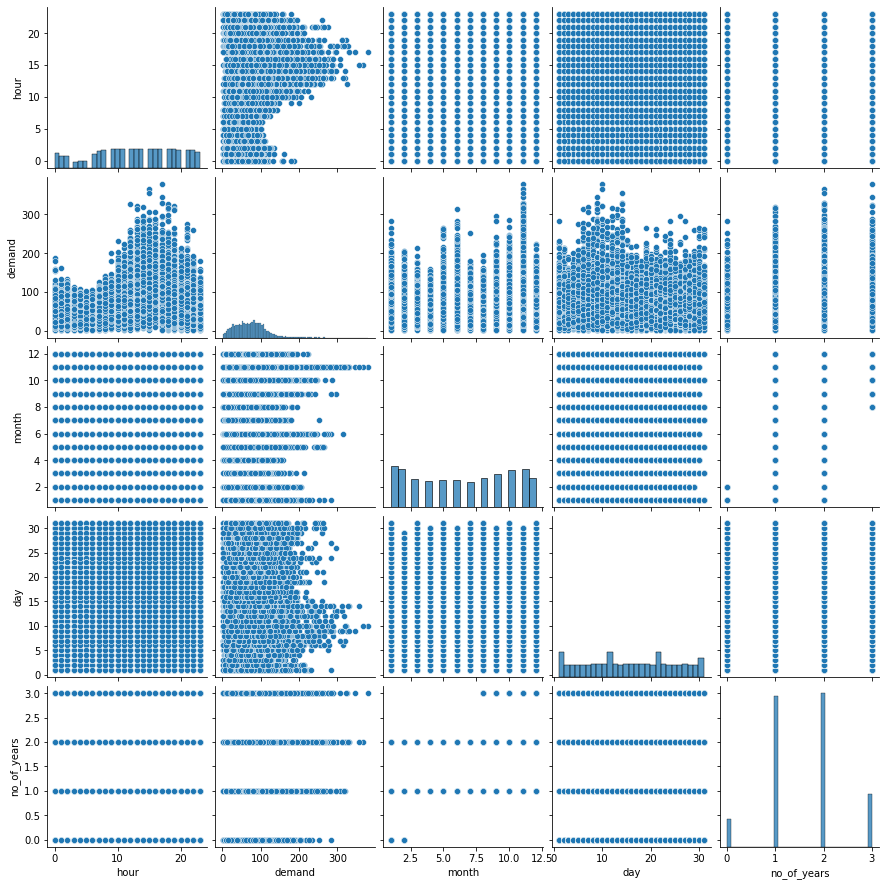

In [40]:
#to understand the correlations visually!
import seaborn as sns
sns.pairplot(train_df)

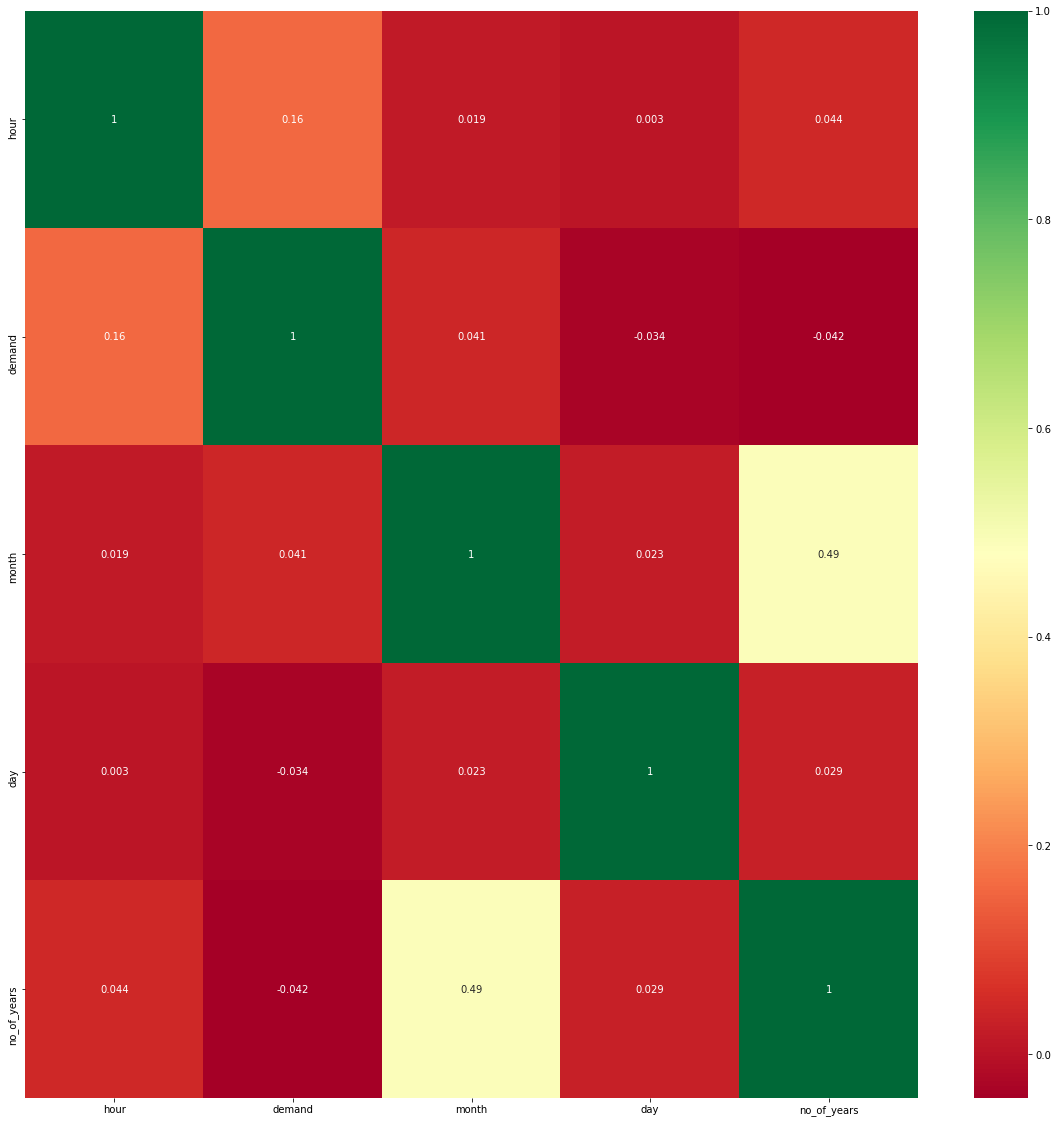

In [49]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = train_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [43]:
#spearating the training data into two new data frames by the help of dependent and independent columns!
X=train_df[['hour','month','day','no_of_years']]
y=train_df['demand']

In [44]:
X.head(5)

,hour,month,day,no_of_years
0,9,8,18,3
1,10,8,18,3
2,13,8,18,3
3,14,8,18,3
4,15,8,18,3


In [38]:
y.head(5)

0     91
1     21
2     23
3    104
4     81
Name: demand, dtype: int64

In [50]:
#We use ExtraTreesRegressor as its a regreesion problem inorder to find the best outcome!
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [51]:
#to get the detailed understanding of the importnat final features present that impacts the output
print(model.feature_importances_)

[0.21849971 0.19312641 0.53193674 0.05643714]


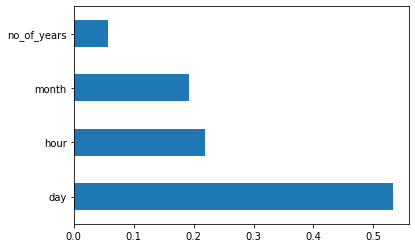

In [52]:
#visualising the important features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [54]:
#applying training and testing for the train data set!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [56]:
#Hyperparameters tuning!
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [57]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [59]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42)

In [60]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [61]:
#best parameters present out of the hyper parameters given
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [62]:
#the best score predicted by the model
rf_random.best_score_

-1153.67880972526

In [63]:
#Applying the model to predict the testing values!
predictions=rf_random.predict(X_test)

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='demand', ylabel='Density'>

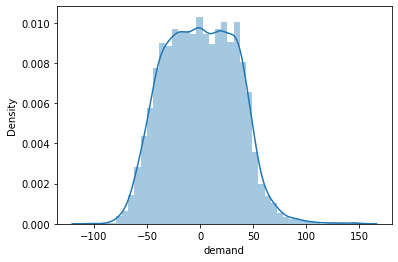

In [64]:
#inorder to find the distribution is gaussion distribution or not I visualized the final outcomes
sns.distplot(y_test-predictions)

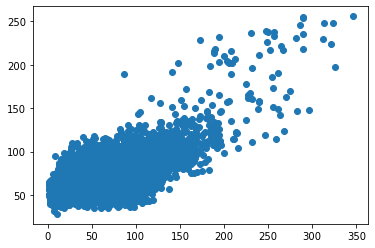

In [65]:
plt.scatter(y_test,predictions)

In [66]:
#from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 33.25581757396532


In [47]:
#reading the csv file from the test data set
Test_df=pd.read_csv("test.csv")

In [48]:
Test_df.head(5)

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [67]:
Test_df['day'] = pd.DatetimeIndex(Test_df['date']).day
Test_df['year'] = pd.DatetimeIndex(Test_df['date']).year
Test_df['month'] = pd.DatetimeIndex(Test_df['date']).month

In [68]:
Test_df.head(5)

,date,hour,day,year,month
0,2021-03-01,0,1,2021,3
1,2021-03-01,1,1,2021,3
2,2021-03-01,2,1,2021,3
3,2021-03-01,3,1,2021,3
4,2021-03-01,5,1,2021,3


In [ ]:
Test_df['current_year']=2021
Test_df['no_of_years']=Test_df['current_year']-Test_df['year']
Test_df.head(5)

In [74]:
#Taking rows into sepafrate data frame named T inorder to apply the predictions of the regression model build.
T=Test_df[['hour','month','day','no_of_years']]
T.head(5)

,hour,month,day,no_of_years
0,0,3,1,0
1,1,3,1,0
2,2,3,1,0
3,3,3,1,0
4,5,3,1,0


In [70]:
Test_df.drop(['date','year','current_year'],axis=1,inplace=True)
Test_df.head(5)

,hour,day,month,no_of_years
0,0,1,3,0
1,1,1,3,0
2,2,1,3,0
3,3,1,3,0
4,5,1,3,0


In [81]:
T.shape

(7650, 4)

In [86]:
res=rf_random.predict(T)

In [87]:
#adding a new column named DEMAND for the data frane named T
T['DEMAND']=res

<ipython-input-87-9476594ae630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T['DEMAND']=res


In [88]:
T

,hour,month,day,no_of_years,DEMAND
0,0,3,1,0,67.867169
1,1,3,1,0,55.099998
2,2,3,1,0,62.454182
3,3,3,1,0,62.728583
4,5,3,1,0,53.527794
...,...,...,...,...,...
7645,19,3,28,-1,101.736922
7646,20,3,28,-1,83.349339
7647,21,3,28,-1,65.072621
7648,22,3,28,-1,64.049318


In [89]:
T.shape

(7650, 5)

In [92]:
T.hour.unique()

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  4], dtype=int64)

In [95]:
final_df=pd.read_csv('test.csv')
final_df.head(5)

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [96]:
#The final submission file format should be matched so I added the Demand column inside the final submissions data frame!
final_df['Demand']=res
final_df.head(5)

,date,hour,Demand
0,2021-03-01,0,67.867169
1,2021-03-01,1,55.099998
2,2021-03-01,2,62.454182
3,2021-03-01,3,62.728583
4,2021-03-01,5,53.527794


In [98]:
#Saving output to a file named submission to upload
final_df.to_csv('submission.csv')